In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('.\\intervenciones-de-seguridad-vial.csv', index_col='fecha', parse_dates=True)

In [3]:
df.head()

,periodo,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
fecha,,,,,,,,,,,,,,
2014-01-01,201401,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2014-01-01,201401,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2014-01-01,201401,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0
2014-03-01,201401,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1
2014-03-01,201401,21,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,2,0,0


In [4]:
df.describe()

,periodo,hora,lesionados,fallecidos,moto,liviano,bus,camion
count,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000,6511.000000
mean,201646.679312,12.390109,0.604976,0.007986,0.384734,1.207495,0.037014,0.148364
std,172.480233,5.734461,0.984207,0.090726,0.532398,0.988931,0.199877,0.411561
min,201401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201506.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,201611.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,201805.000000,17.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000
max,202002.000000,23.000000,21.000000,2.000000,3.000000,9.000000,2.000000,3.000000


In [5]:
%matplotlib inline

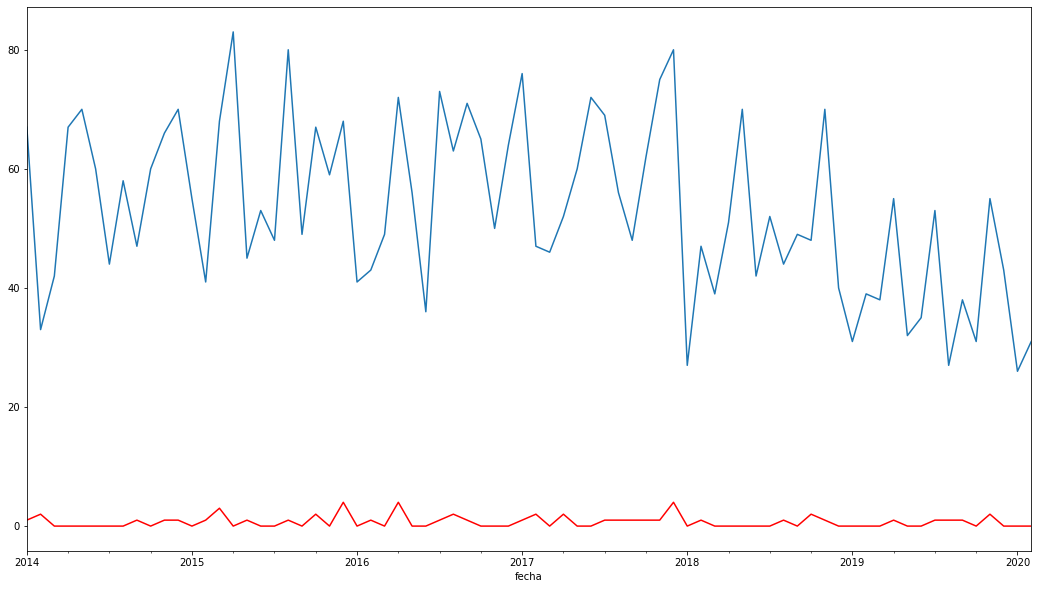

In [6]:
df['lesionados'].resample('M').sum().plot(figsize=(18,10))
df['fallecidos'].resample('M').sum().plot(figsize=(18,10), color='red')

In [7]:
df_lesionados = df[df['lesionados']>0]

In [8]:
lesionados_por_hora = df_lesionados.groupby('hora').sum()['lesionados']

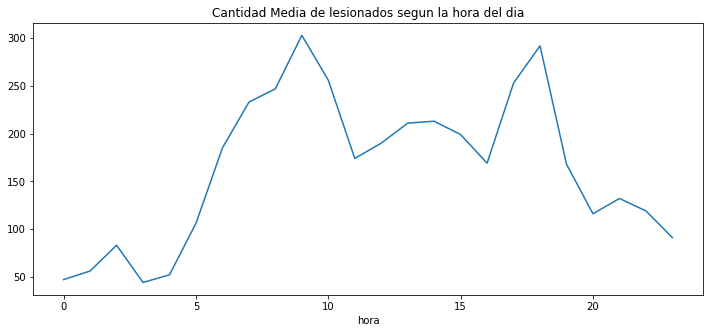

In [9]:
titulo_lesionados_por_hora = "Cantidad Media de lesionados segun la hora del dia"
lesionados_por_hora.plot(figsize=(12,5), title=titulo_lesionados_por_hora)

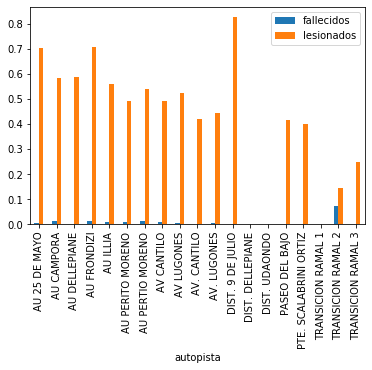

In [10]:
condiciones_meteorologicas_pivot = df.pivot_table(index='autopista', values=['lesionados', 'fallecidos'])
condiciones_meteorologicas_pivot.plot.bar()

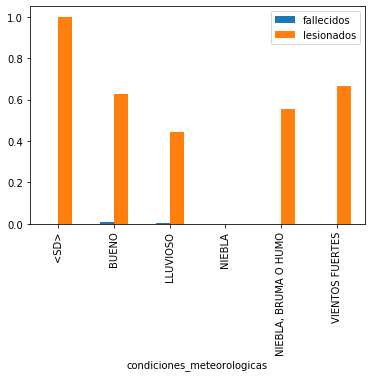

In [11]:
condiciones_meteorologicas_pivot = df.pivot_table(index='condiciones_meteorologicas', values=['lesionados', 'fallecidos'])
condiciones_meteorologicas_pivot.plot.bar()

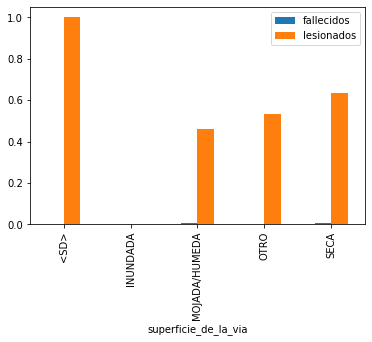

In [12]:
superficie_de_la_via_pivot = df.pivot_table(index='superficie_de_la_via', values=['lesionados', 'fallecidos'])
superficie_de_la_via_pivot.plot.bar()

In [13]:
df.head()

,periodo,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
fecha,,,,,,,,,,,,,,
2014-01-01,201401,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2014-01-01,201401,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2014-01-01,201401,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0
2014-03-01,201401,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1
2014-03-01,201401,21,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,2,0,0


In [14]:
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

In [15]:
to_drop

[]

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['n_autopista'] = le.fit_transform(df['autopista'])
df['n_condiciones_meteorologicas'] = le.fit_transform(df['condiciones_meteorologicas'])
df['n_superficie_de_la_via'] = le.fit_transform(df['superficie_de_la_via'])
df['n_tipo_de_siniestro'] = le.fit_transform(df['tipo_de_siniestro'])

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [18]:
train_data = train[['hora', 'n_autopista', 'n_condiciones_meteorologicas', 'n_superficie_de_la_via', 'n_tipo_de_siniestro', 'moto', 'liviano', 'bus','camion']]
train_target_lesionados = pd.to_numeric(train['lesionados']).apply(lambda x: 1 if x > 0 else 0)

test_data = test[['hora', 'n_autopista', 'n_condiciones_meteorologicas', 'n_superficie_de_la_via', 'n_tipo_de_siniestro', 'moto', 'liviano', 'bus','camion']]
test_target_lesionados = pd.to_numeric(test['lesionados']).apply(lambda x: 1 if x > 0 else 0)

data = df[['hora', 'n_autopista', 'n_condiciones_meteorologicas', 'n_superficie_de_la_via', 'n_tipo_de_siniestro', 'moto', 'liviano', 'bus','camion']]
target_lesionados = pd.to_numeric(df['lesionados']).apply(lambda x: 1 if x > 0 else 0)

In [19]:
train_data.shape

(5208, 9)

In [20]:
train_target_lesionados.shape

(5208,)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
tree_clf = DecisionTreeClassifier(max_depth=3)

In [23]:
tree_clf.fit(train_data, train_target_lesionados)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

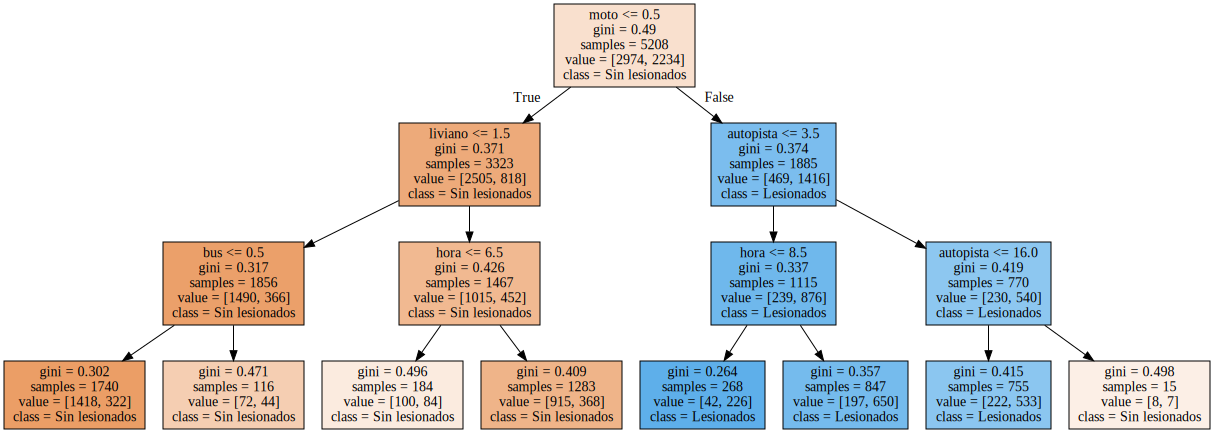

In [24]:
import graphviz
from sklearn.tree import export_graphviz

feature_names = ['hora', 'autopista', 'condiciones_meteorologicas', 'superficie_de_la_via', 'tipo_de_siniestro', 'moto', 'liviano', 'bus', 'camion']

export_graphviz(
        tree_clf,
        out_file="lesionados.dot",
        feature_names=feature_names,
        class_names=["Sin lesionados","Lesionados"],
        filled=True
    )

with open("lesionados.dot") as f:
    dot_graph = f.read()

# remove the display(...)

display(graphviz.Source(dot_graph))

In [25]:
pred_target_lesionados = tree_clf.predict(test_data)

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)
confusion_matrix(species, predictions)

array([[621, 111],
       [212, 359]], dtype=int64)

In [27]:
# Efectividad del 75% aproximadamente sobre 1511 casos de prueba. Cambiando el tamaño del arbol, el resultado sigue siendo similar.

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [29]:
ab_clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
ab_clf.fit(data, target_lesionados)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=0)

In [30]:
pred_target_lesionados = ab_clf.predict(test_data)

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)
confusion_matrix(species, predictions)

array([[619, 113],
       [200, 371]], dtype=int64)

In [31]:
# AdaBoost - rendimiento similar

In [32]:
rf_clf = RandomForestClassifier(n_estimators=10, random_state=0)
rf_clf.fit(data, target_lesionados)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
pred_target_lesionados = rf_clf.predict(test_data)

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)
confusion_matrix(species, predictions)

array([[666,  66],
       [112, 459]], dtype=int64)

In [34]:
# RandomTree peor que Adaboost

In [35]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(data, target_lesionados)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
pred_target_lesionados = nb_clf.predict(test_data)

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)
confusion_matrix(species, predictions)

array([[603, 129],
       [211, 360]], dtype=int64)

In [37]:
# Naive Bayes performance 77%

In [38]:
from sklearn.svm import SVC

#    SVC(kernel="linear", C=0.025),
#    SVC(gamma=2, C=1),

SVC_clf = SVC(kernel="linear", C=0.025, probability=True)
SVC_clf.fit(data, target_lesionados)

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
pred_target_lesionados = SVC_clf.predict(test_data)

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)
confusion_matrix(species, predictions)

array([[617, 115],
       [212, 359]], dtype=int64)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

KN_clf = KNeighborsClassifier(3)
KN_clf.fit(data, target_lesionados)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [41]:
pred_target_lesionados = KN_clf.predict(test_data)

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)
confusion_matrix(species, predictions)

array([[623, 109],
       [148, 423]], dtype=int64)

In [42]:
from sklearn.ensemble import VotingClassifier

In [43]:
est_NB = GaussianNB()
score_NB = est_NB.fit(data, target_lesionados).score(test_data,test_target_lesionados)

In [44]:
est_DT = DecisionTreeClassifier()
score_DT = est_DT.fit(data, target_lesionados).score(test_data,test_target_lesionados)

In [45]:
est_RF = RandomForestClassifier(random_state=1, n_estimators=10)
score_RF = est_RF.fit(data, target_lesionados).score(test_data,test_target_lesionados)

In [46]:
est_SVC = SVC(gamma=2, C=1, probability=True)
score_SVC = est_SVC.fit(data, target_lesionados).score(test_data,test_target_lesionados)

In [47]:
est_KN = KNeighborsClassifier(3)
score_KN = est_KN.fit(data, target_lesionados).score(test_data,test_target_lesionados)

In [48]:
est_Ensemble = VotingClassifier(estimators=[('RF', est_RF), ('SVC', est_SVC)],
                        voting='soft')

score_Ensemble = est_Ensemble.fit(data, target_lesionados).score(test_data,test_target_lesionados)

In [49]:
print("Ensemble score: {}".format(score_Ensemble)) 

Ensemble score: 0.8726016884113584


In [50]:
print("Naive Bayes score: {}".format(score_NB))
print("Decision Tree score: {}".format(score_DT))
print("Random Forest score: {}".format(score_RF))
print("SVC score: {}".format(score_SVC))
print("K-Neighbours score: {}".format(score_KN))

Naive Bayes score: 0.7390636991557943
Decision Tree score: 0.8687643898695319
Random Forest score: 0.8633921719109747
SVC score: 0.8710667689946278
K-Neighbours score: 0.8027628549501151


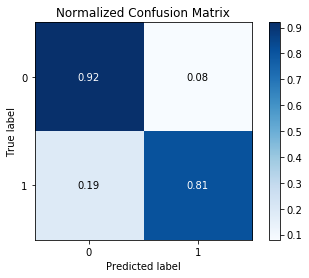

In [64]:
import scikitplot as skplt
import matplotlib.pyplot as plt

pred_target_lesionados = est_Ensemble.predict(test_data)

species = np.array(test_target_lesionados)
predictions = np.array(pred_target_lesionados)

skplt.metrics.plot_confusion_matrix(species, predictions, normalize=True)
plt.show()

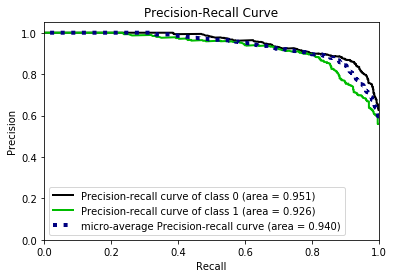

In [69]:
probas = est_Ensemble.predict_proba(test_data)

skplt.metrics.plot_precision_recall(test_target_lesionados, probas)

plt.show()

In [71]:
from sklearn.metrics import recall_score

recall_score(test_target_lesionados, pred_target_lesionados, average='weighted')

0.8726016884113584

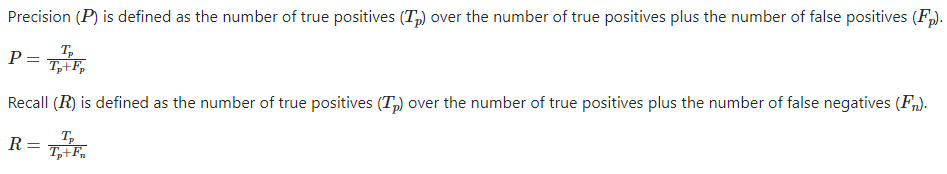